In [22]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [14]:
gender= df['Gender'].value_counts()
gender

Female    112
Male       88
Name: Gender, dtype: int64

In [15]:
gender.index

Index(['Female', 'Male'], dtype='object')

In [16]:
gender.values

array([112,  88], dtype=int64)

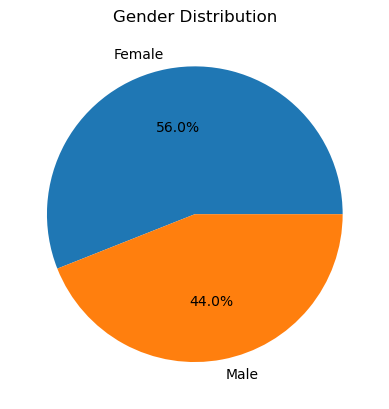

In [20]:
# Create a pie chart FOR gender distribution
plt.pie(gender.values, labels=gender.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [23]:
#dropping the columns which are not necessary for clustering
X= df.drop(columns=['CustomerID','Gender','Age'],axis=1).values

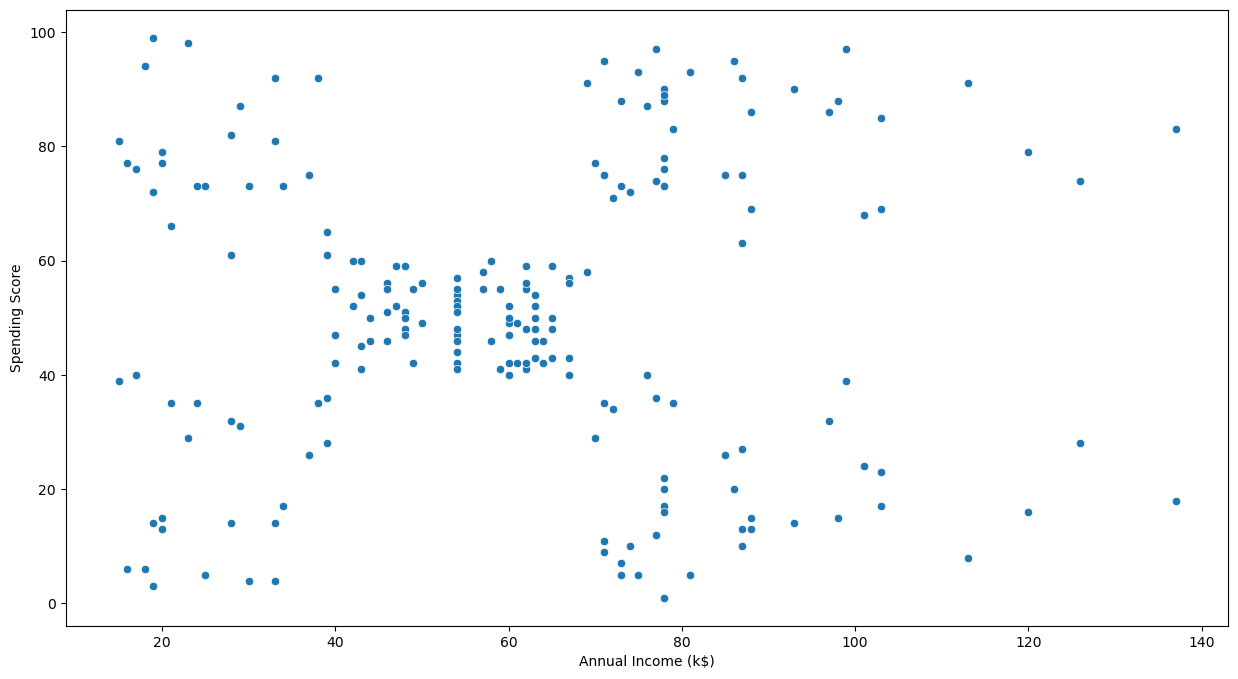

In [25]:
# visualize the data points
plt.figure(figsize=(15,8))
sns.scatterplot(X[:,0],X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

## Find the K value using the Elbow method

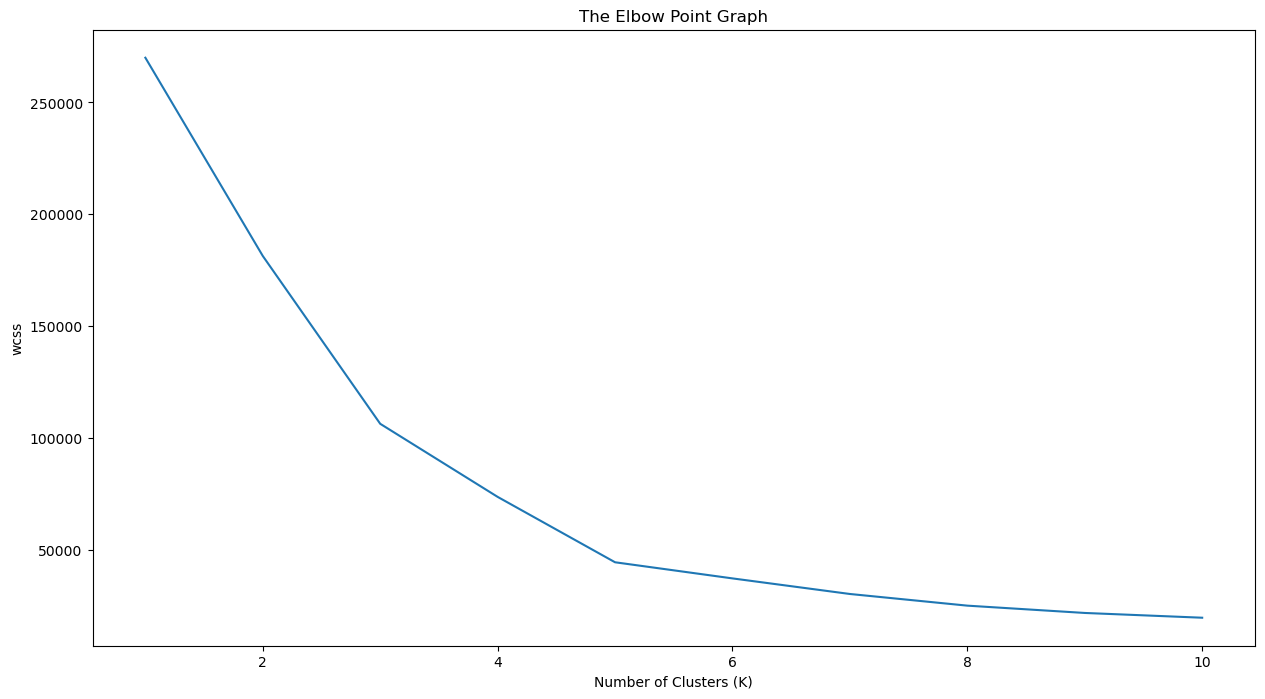

In [28]:
wcss=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

## wcss doesn't reduce much after k=5. so,we can choose 5 as the perfect K value or Clusters.

### Training the K-means algorithm on the training dataset

In [29]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
Y = kmeans.fit_predict(X)

## Centroid points

In [30]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

## Visualize the clusters formed

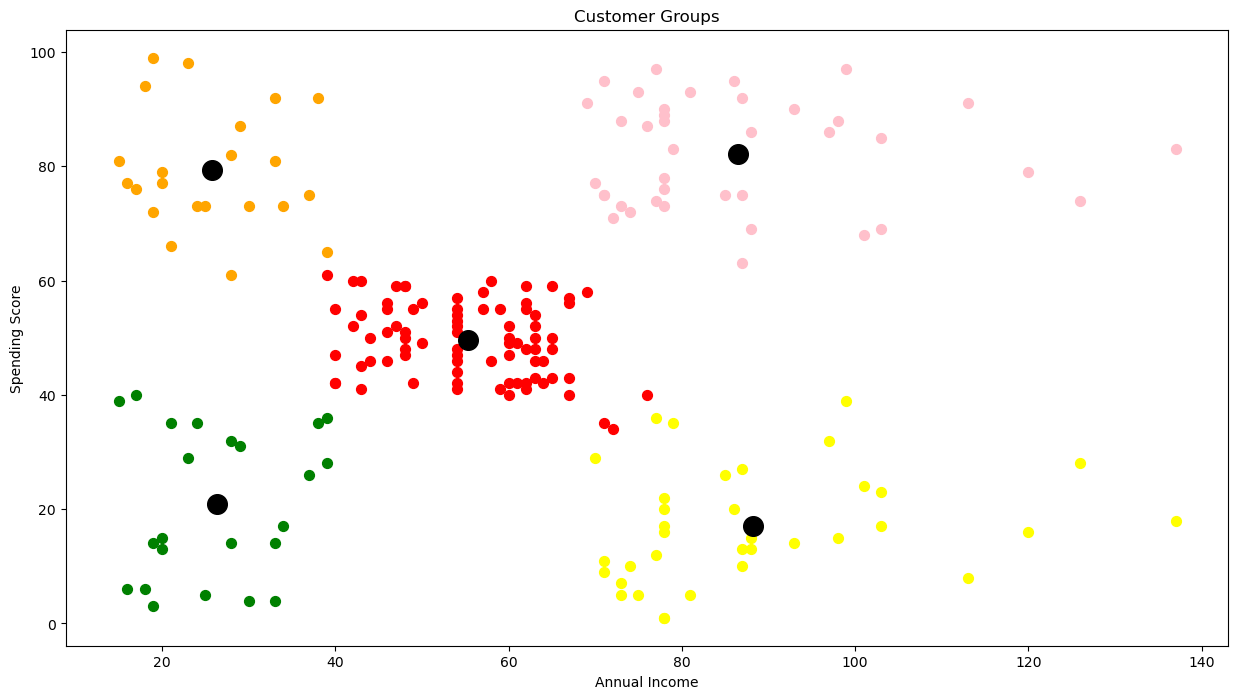

In [31]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='black', label='C')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Conclusion

### we can clearly see the five clusters formed

### The Black dots represent the centroid for each cluster